<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-07-11 16:44:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  53.8MB/s    in 2.8s    

2025-07-11 16:44:49 (53.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


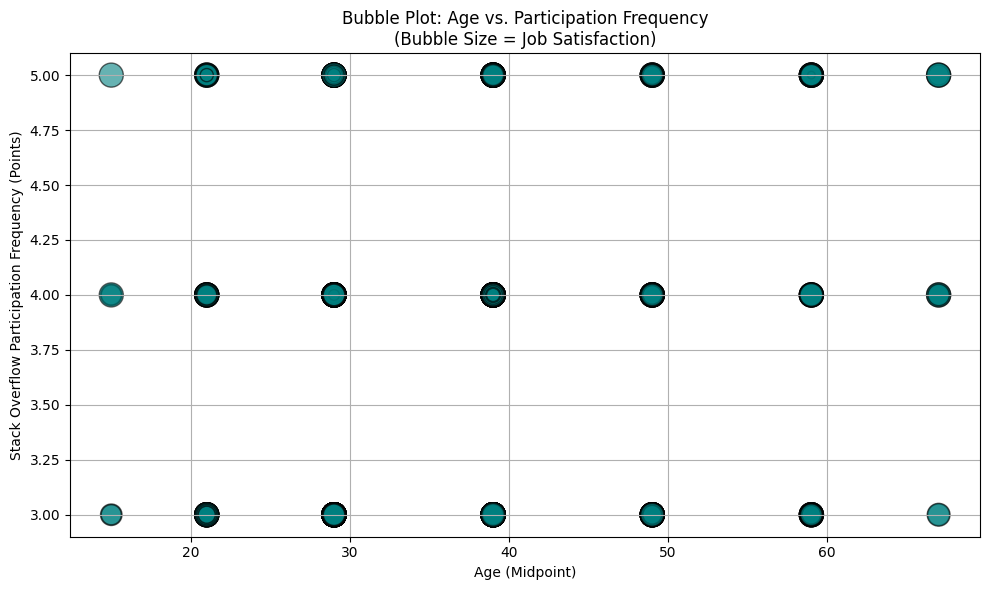

In [8]:
import re
# 1. Convert 'Age' strings like '23-25 years old' to midpoint integers
def extract_age_midpoint(age_str):
    if pd.isnull(age_str):
        return None
    match = re.search(r'(\d+)[^\d]+(\d+)', str(age_str))
    if match:
        return (int(match.group(1)) + int(match.group(2))) // 2
    elif 'Under' in age_str:
        return 15
    elif '65' in age_str:
        return 67
    else:
        return None

df['AgeNum'] = df['Age'].apply(extract_age_midpoint)

# 2. Drop missing data
df_bubble = df[['AgeNum', 'SOPartFreqPoints', 'JobSat']].dropna()

# 3. Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    df_bubble['AgeNum'],
    df_bubble['SOPartFreqPoints'],
    s=df_bubble['JobSat'] * 30,  # Bubble size based on satisfaction
    alpha=0.6,
    color='teal',
    edgecolors='black'
)

plt.xlabel('Age (Midpoint)')
plt.ylabel('Stack Overflow Participation Frequency (Points)')
plt.title('Bubble Plot: Age vs. Participation Frequency\n(Bubble Size = Job Satisfaction)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


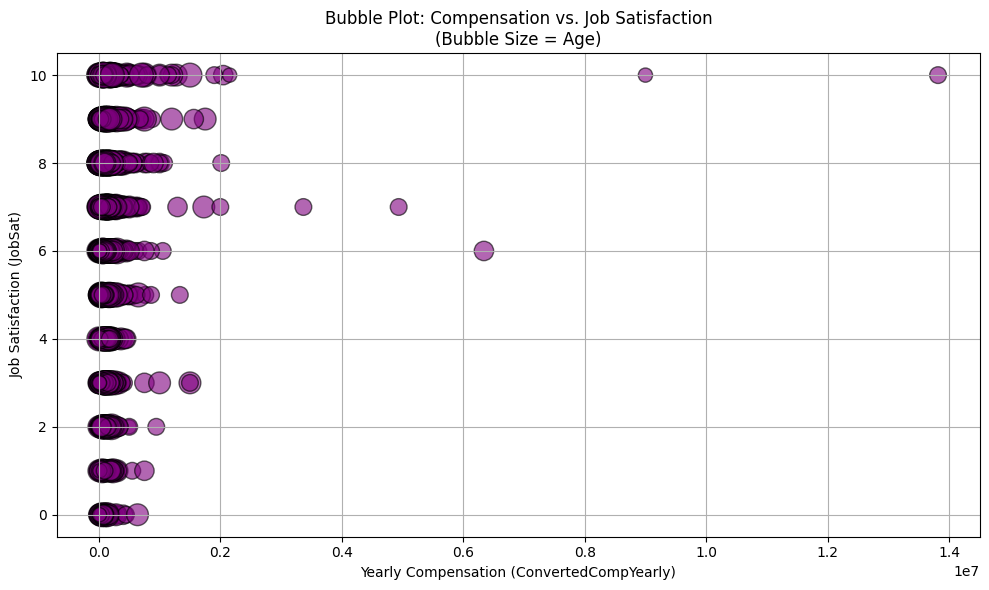

In [9]:
# Function to convert Age string to midpoint number (same as before)
def extract_age_midpoint(age_str):
    if pd.isnull(age_str):
        return None
    match = re.search(r'(\d+)[^\d]+(\d+)', str(age_str))
    if match:
        return (int(match.group(1)) + int(match.group(2))) // 2
    elif 'Under' in age_str:
        return 15
    elif '65' in age_str:
        return 67
    else:
        return None

# Apply conversion
df['AgeNum'] = df['Age'].apply(extract_age_midpoint)

# Filter to keep rows with all needed data
df_bubble = df[['ConvertedCompYearly', 'JobSat', 'AgeNum']].dropna()

# Optional: Convert compensation to numeric if not already
df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
df_bubble = df_bubble.dropna(subset=['ConvertedCompYearly'])

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSat'],
    s=df_bubble['AgeNum'] * 5,  # Bubble size proportional to age
    alpha=0.6,
    color='purple',
    edgecolors='black'
)

plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSat)')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction\n(Bubble Size = Age)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



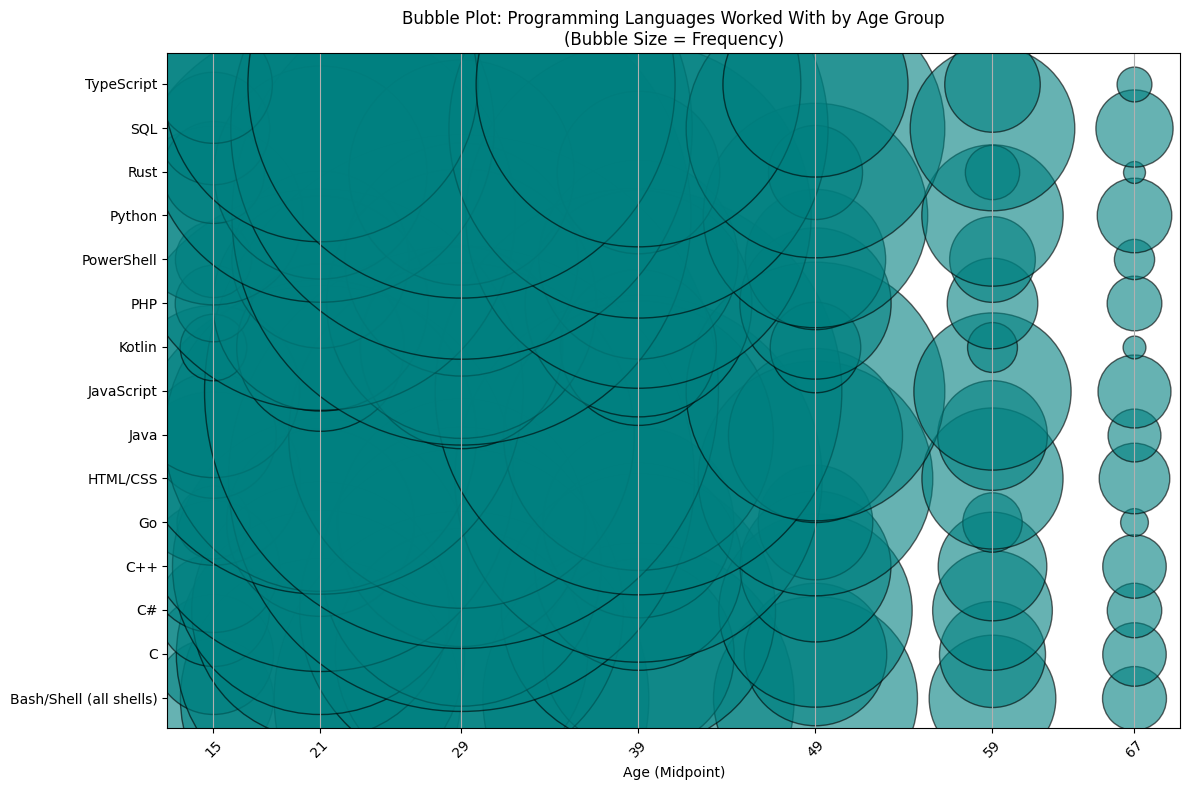

In [11]:
# Convert age ranges to midpoints (same function as before)
def extract_age_midpoint(age_str):
    if pd.isnull(age_str):
        return None
    match = re.search(r'(\d+)[^\d]+(\d+)', str(age_str))
    if match:
        return (int(match.group(1)) + int(match.group(2))) // 2
    elif 'Under' in age_str:
        return 15
    elif '65' in age_str:
        return 67
    else:
        return None

df['AgeNum'] = df['Age'].apply(extract_age_midpoint)

# Drop rows with missing AgeNum or LanguageHaveWorkedWith
df_clean = df.dropna(subset=['AgeNum', 'LanguageHaveWorkedWith'])

df_clean = df.dropna(subset=['AgeNum', 'LanguageHaveWorkedWith']).copy()  # add .copy() here
df_clean['LanguageList'] = df_clean['LanguageHaveWorkedWith'].str.split(';')  # or ',' depending on your data
df_exploded = df_clean.explode('LanguageList')
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()  # clean whitespace

# Group by AgeNum and LanguageList and count frequency
freq_df = df_exploded.groupby(['AgeNum', 'LanguageList']).size().reset_index(name='Frequency')

# To make the plot readable, you can filter the top languages overall or top per age group
# Example: Keep only languages with total frequency > threshold
top_languages = freq_df.groupby('LanguageList')['Frequency'].sum().sort_values(ascending=False).head(15).index
freq_df = freq_df[freq_df['LanguageList'].isin(top_languages)]

# Pivot for plotting: languages on y-axis, age groups on x-axis
pivot_df = freq_df.pivot(index='LanguageList', columns='AgeNum', values='Frequency').fillna(0)

# Plot bubble plot
plt.figure(figsize=(12, 8))

ages = pivot_df.columns
languages = pivot_df.index

for i, lang in enumerate(languages):
    for j, age in enumerate(ages):
        size = pivot_df.loc[lang, age]
        if size > 0:
            plt.scatter(age, i, s=size * 10, alpha=0.6, color='teal', edgecolors='black')

plt.yticks(range(len(languages)), languages)
plt.xticks(ages, rotation=45)
plt.xlabel('Age (Midpoint)')
plt.title('Bubble Plot: Programming Languages Worked With by Age Group\n(Bubble Size = Frequency)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [22]:
print("Null counts:")
print(df['DatabaseWantToWorkWith'].isnull().sum())
print(df['JobSatPoints'].isnull().sum())

Null counts:
22879
65437


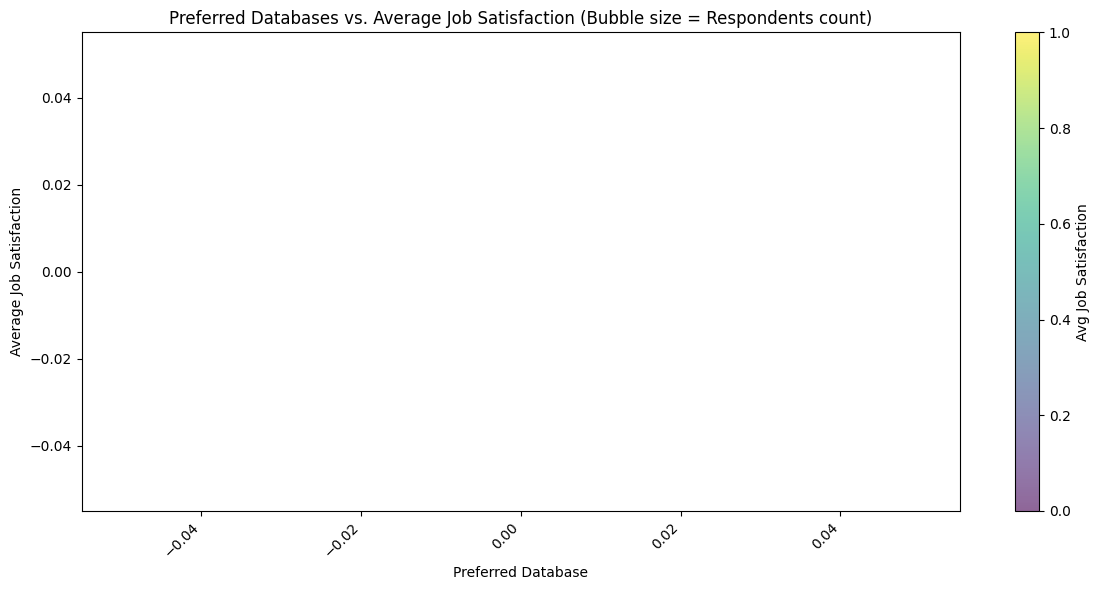

In [23]:
# Filter only non-null preferred databases
df_filtered = df[df['DatabaseWantToWorkWith'].notnull()]

# Count respondents per database
db_counts = df_filtered['DatabaseWantToWorkWith'].value_counts()

# Calculate mean job satisfaction per database where available
db_js_mean = df_filtered.groupby('DatabaseWantToWorkWith')['JobSatPoints'].mean()

# Combine counts and job satisfaction into a DataFrame
plot_df = pd.DataFrame({
    'Count': db_counts,
    'AvgJobSat': db_js_mean
}).dropna()  # drop if JobSat is missing

# Bubble plot: size by Count, color by AvgJobSat
plt.figure(figsize=(12, 6))
plt.scatter(
    plot_df.index,
    plot_df['AvgJobSat'],
    s=plot_df['Count']*10,  # scale size for visibility
    alpha=0.6,
    c=plot_df['AvgJobSat'],
    cmap='viridis',
    edgecolors='black'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Preferred Database')
plt.ylabel('Average Job Satisfaction')
plt.title('Preferred Databases vs. Average Job Satisfaction (Bubble size = Respondents count)')
plt.colorbar(label='Avg Job Satisfaction')
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


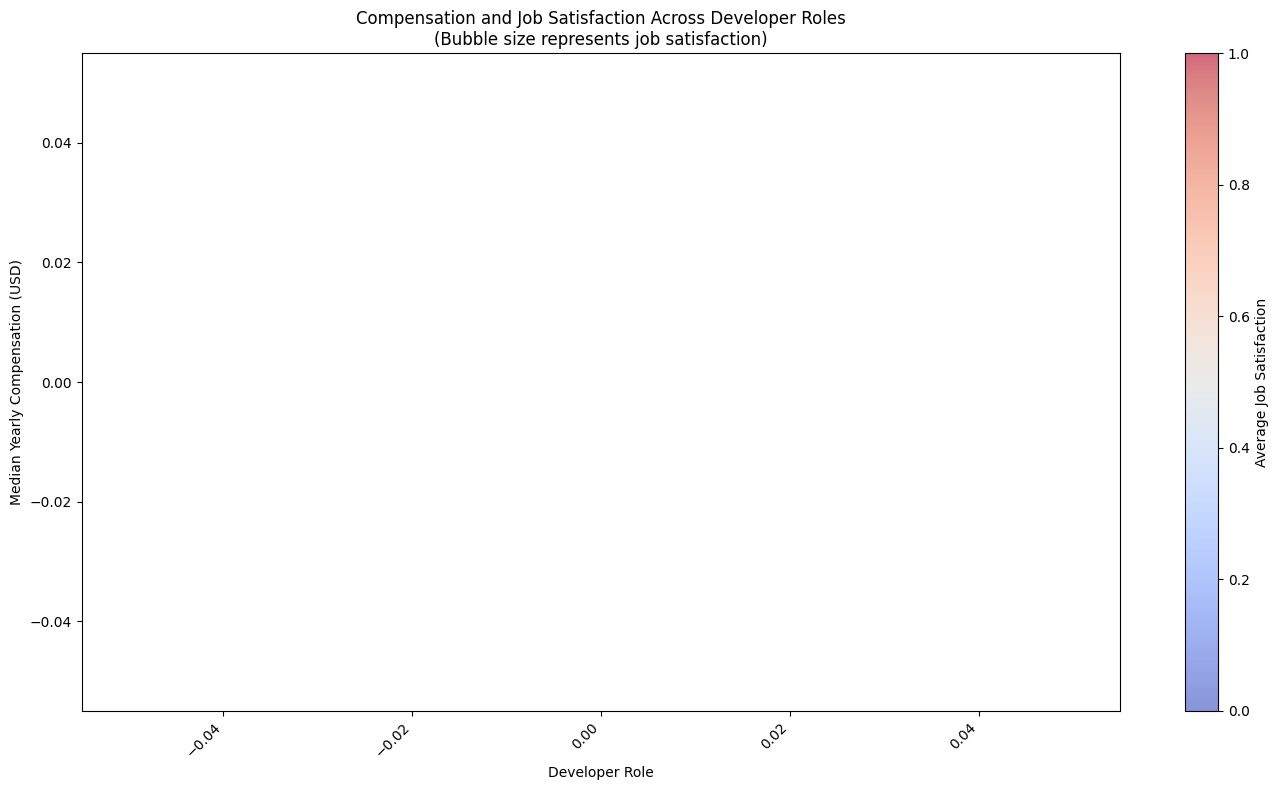

In [24]:
# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSatPoints'])

# Explode DevType if multiple roles per respondent
df_clean['DevTypeList'] = df_clean['DevType'].str.split(';')
df_exploded = df_clean.explode('DevTypeList')

# Strip whitespace from role names
df_exploded['DevTypeList'] = df_exploded['DevTypeList'].str.strip()

# Group by developer role to get median compensation and average job satisfaction
agg_df = df_exploded.groupby('DevTypeList').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints': 'mean',
    'DevTypeList': 'count'  # count respondents per role
}).rename(columns={'DevTypeList': 'Count'})

# Sort roles by count, take top 15 to keep plot readable
top_roles = agg_df.sort_values('Count', ascending=False).head(15)

# Plotting
plt.figure(figsize=(14,8))
scatter = plt.scatter(
    x=top_roles.index,
    y=top_roles['ConvertedCompYearly'],
    s=top_roles['JobSatPoints'] * 200,  # Scale bubble size by job satisfaction
    alpha=0.6,
    c=top_roles['JobSatPoints'],       # Color by job satisfaction
    cmap='coolwarm',
    edgecolors='black'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Developer Role')
plt.ylabel('Median Yearly Compensation (USD)')
plt.title('Compensation and Job Satisfaction Across Developer Roles\n(Bubble size represents job satisfaction)')
plt.colorbar(scatter, label='Average Job Satisfaction')

plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


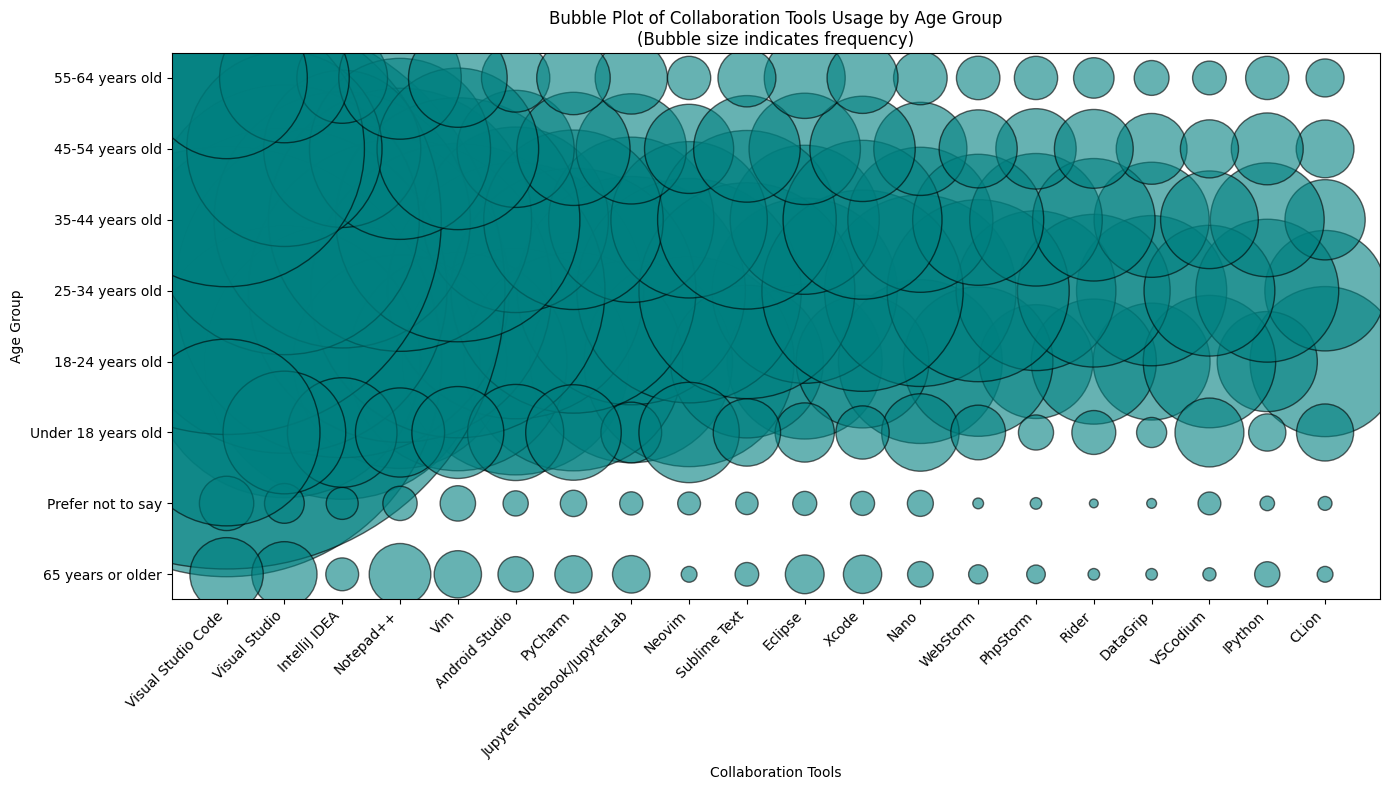

In [27]:
# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith'])

# Split the collaboration tools string into lists
df_clean = df.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith']).copy()
df_clean.loc[:, 'ToolList'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')

# Explode so each tool is a separate row
df_exploded = df_clean.explode('ToolList')

# Strip whitespace
df_exploded['ToolList'] = df_exploded['ToolList'].str.strip()

# Group by Age and Tool to count frequency
freq = df_exploded.groupby(['Age', 'ToolList']).size().reset_index(name='Count')

# To plot nicely, let's sort Age groups (assuming they are categorical with order)
age_order = sorted(freq['Age'].unique(), key=lambda x: int(x.split('-')[0]) if '-' in x else 0)
freq['Age'] = pd.Categorical(freq['Age'], categories=age_order, ordered=True)

# Create figure
plt.figure(figsize=(14,8))

# Create bubble plot
# Map Age categories to numeric for y-axis
y = freq['Age'].cat.codes
x = freq['ToolList']

# Since there may be many tools, reduce clutter by plotting top N tools by total usage
top_tools = freq.groupby('ToolList')['Count'].sum().sort_values(ascending=False).head(20).index
freq_top = freq[freq['ToolList'].isin(top_tools)]

# Map x positions for top tools
tool_positions = {tool: i for i, tool in enumerate(top_tools)}
x_pos = freq_top['ToolList'].map(tool_positions)
y_pos = freq_top['Age'].cat.codes

# Bubble sizes scaled by count
sizes = freq_top['Count'] * 10  # Adjust multiplier for visibility

scatter = plt.scatter(x_pos, y_pos, s=sizes, alpha=0.6, edgecolors='black', color='teal')

# Set axis labels and ticks
plt.xticks(ticks=range(len(top_tools)), labels=top_tools, rotation=45, ha='right')
plt.yticks(ticks=range(len(age_order)), labels=age_order)
plt.xlabel('Collaboration Tools')
plt.ylabel('Age Group')
plt.title('Bubble Plot of Collaboration Tools Usage by Age Group\n(Bubble size indicates frequency)')

plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



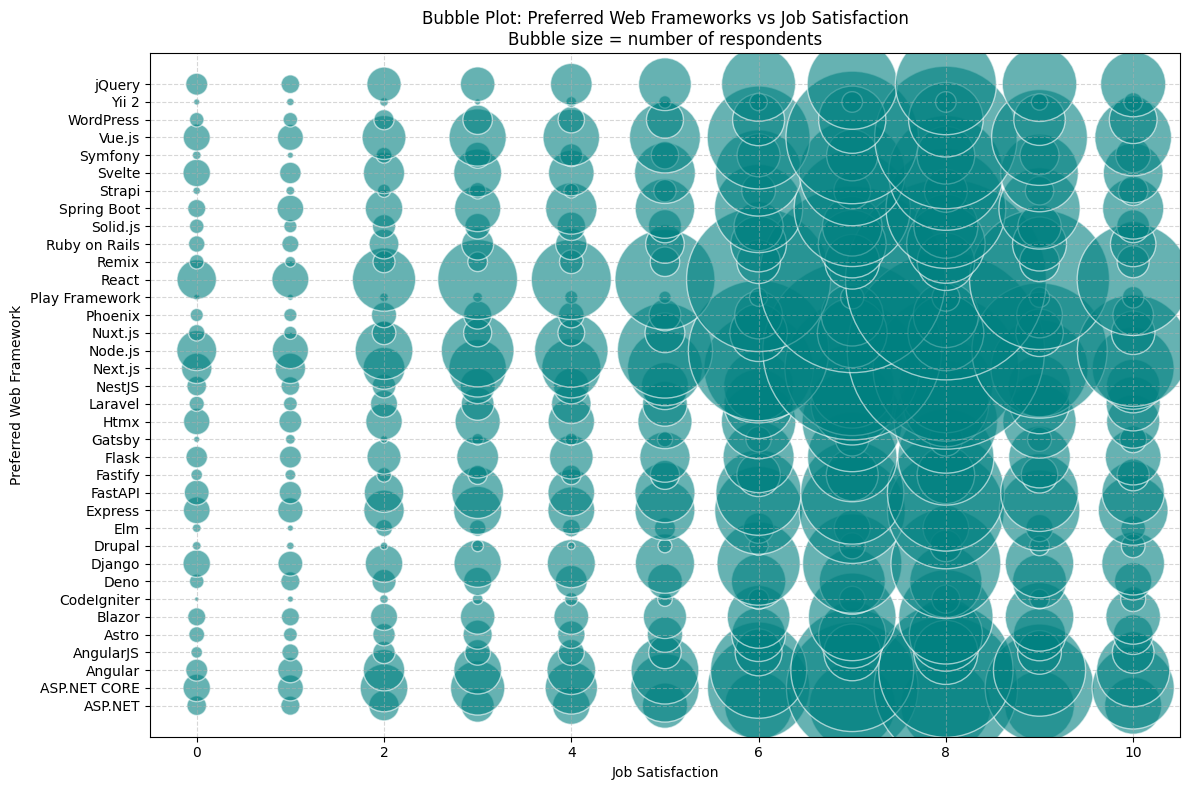

In [28]:
# Step 1: Drop rows with missing data in needed columns
df_clean = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat']).copy()

# Step 2: Split the frameworks into lists
df_clean.loc[:, 'FrameworkList'] = df_clean['WebframeWantToWorkWith'].str.split(';')

# Step 3: Explode so each framework has its own row
df_exploded = df_clean.explode('FrameworkList')

# Clean extra whitespace
df_exploded['FrameworkList'] = df_exploded['FrameworkList'].str.strip()

# Step 4: Group by framework and job satisfaction, count respondents
grouped = df_exploded.groupby(['FrameworkList', 'JobSat']).size().reset_index(name='Count')

# Step 5: Plot bubble plot
plt.figure(figsize=(12, 8))

# We will plot JobSat on x-axis, FrameworkList on y-axis
sizes = grouped['Count'] * 10  # scale bubble sizes

scatter = plt.scatter(
    x=grouped['JobSat'],
    y=grouped['FrameworkList'],
    s=sizes,
    alpha=0.6,
    edgecolors='w',
    color='teal'
)

plt.xlabel('Job Satisfaction')
plt.ylabel('Preferred Web Framework')
plt.title('Bubble Plot: Preferred Web Frameworks vs Job Satisfaction\nBubble size = number of respondents')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



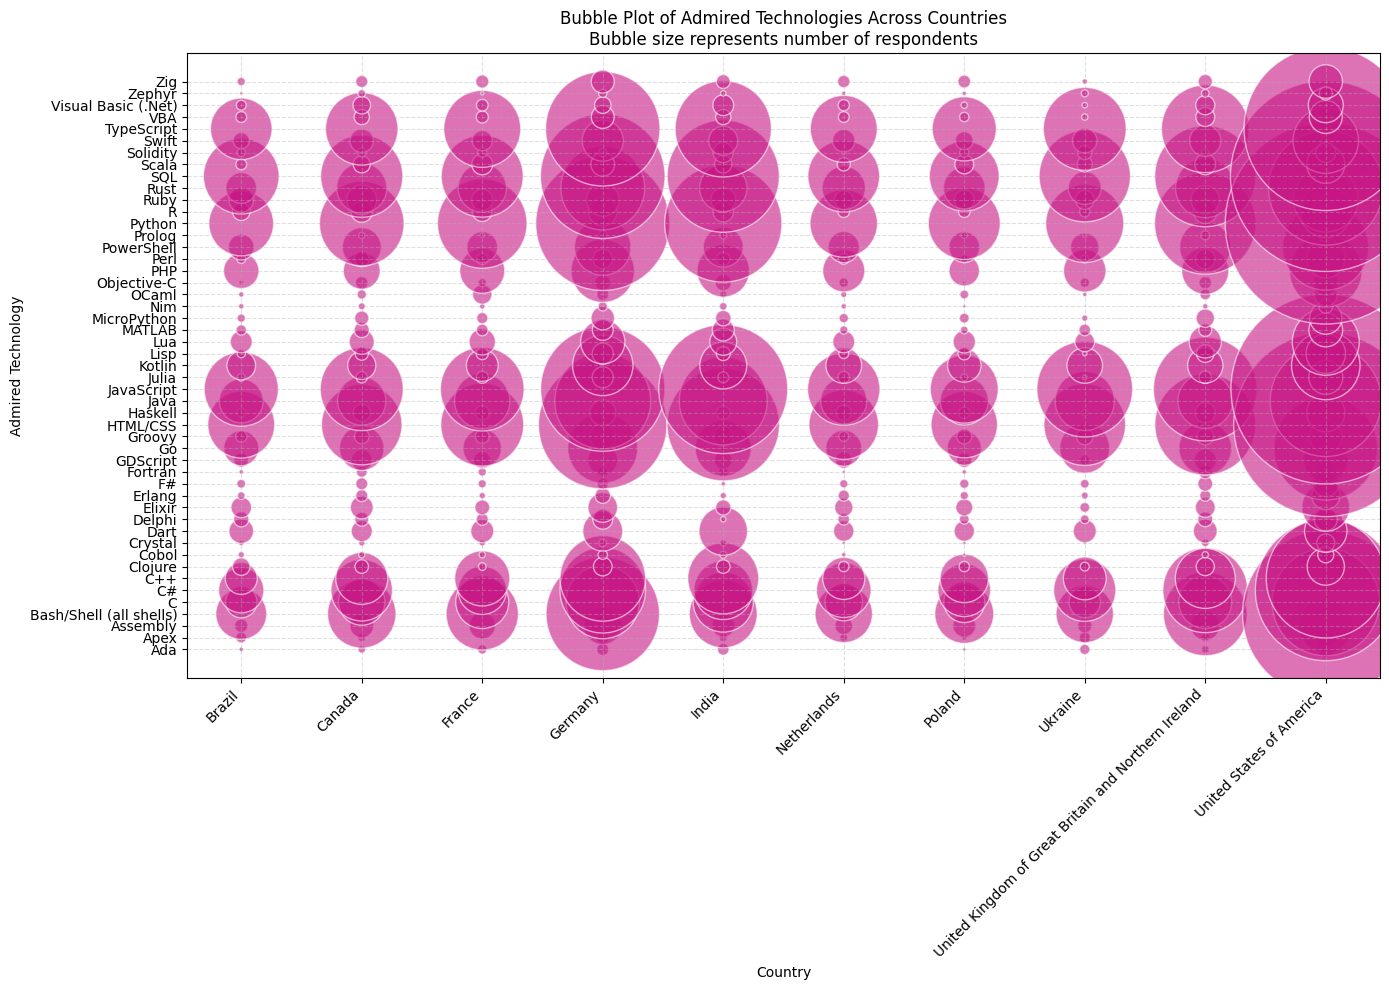

In [29]:
# Step 1: Clean data - drop nulls in required columns
df_clean = df.dropna(subset=['LanguageAdmired', 'Country']).copy()

# Step 2: Split admired technologies into lists
df_clean.loc[:, 'AdmiredList'] = df_clean['LanguageAdmired'].str.split(';')

# Step 3: Explode to have one technology per row
df_exploded = df_clean.explode('AdmiredList')

# Strip spaces
df_exploded['AdmiredList'] = df_exploded['AdmiredList'].str.strip()

# Step 4: Group by Country and Admired Technology and count
grouped = df_exploded.groupby(['Country', 'AdmiredList']).size().reset_index(name='Count')

# Optional: Filter top countries or top technologies if needed
# e.g., top 10 countries by total counts
top_countries = grouped.groupby('Country')['Count'].sum().nlargest(10).index
grouped = grouped[grouped['Country'].isin(top_countries)]

# Step 5: Plot bubble plot

plt.figure(figsize=(14, 10))

# Use bubble size scaled by Count
sizes = grouped['Count'] * 5  # Adjust multiplier for better visualization

plt.scatter(
    x=grouped['Country'],
    y=grouped['AdmiredList'],
    s=sizes,
    alpha=0.6,
    edgecolors='w',
    color='mediumvioletred'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Admired Technology')
plt.title('Bubble Plot of Admired Technologies Across Countries\nBubble size represents number of respondents')

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
